<a href="https://colab.research.google.com/github/Manas24vani/ML_project_3/blob/main/ML_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project 3

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
plt.style.use('fivethirtyeight')


In [7]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [8]:
df.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Inital EDA

In [9]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

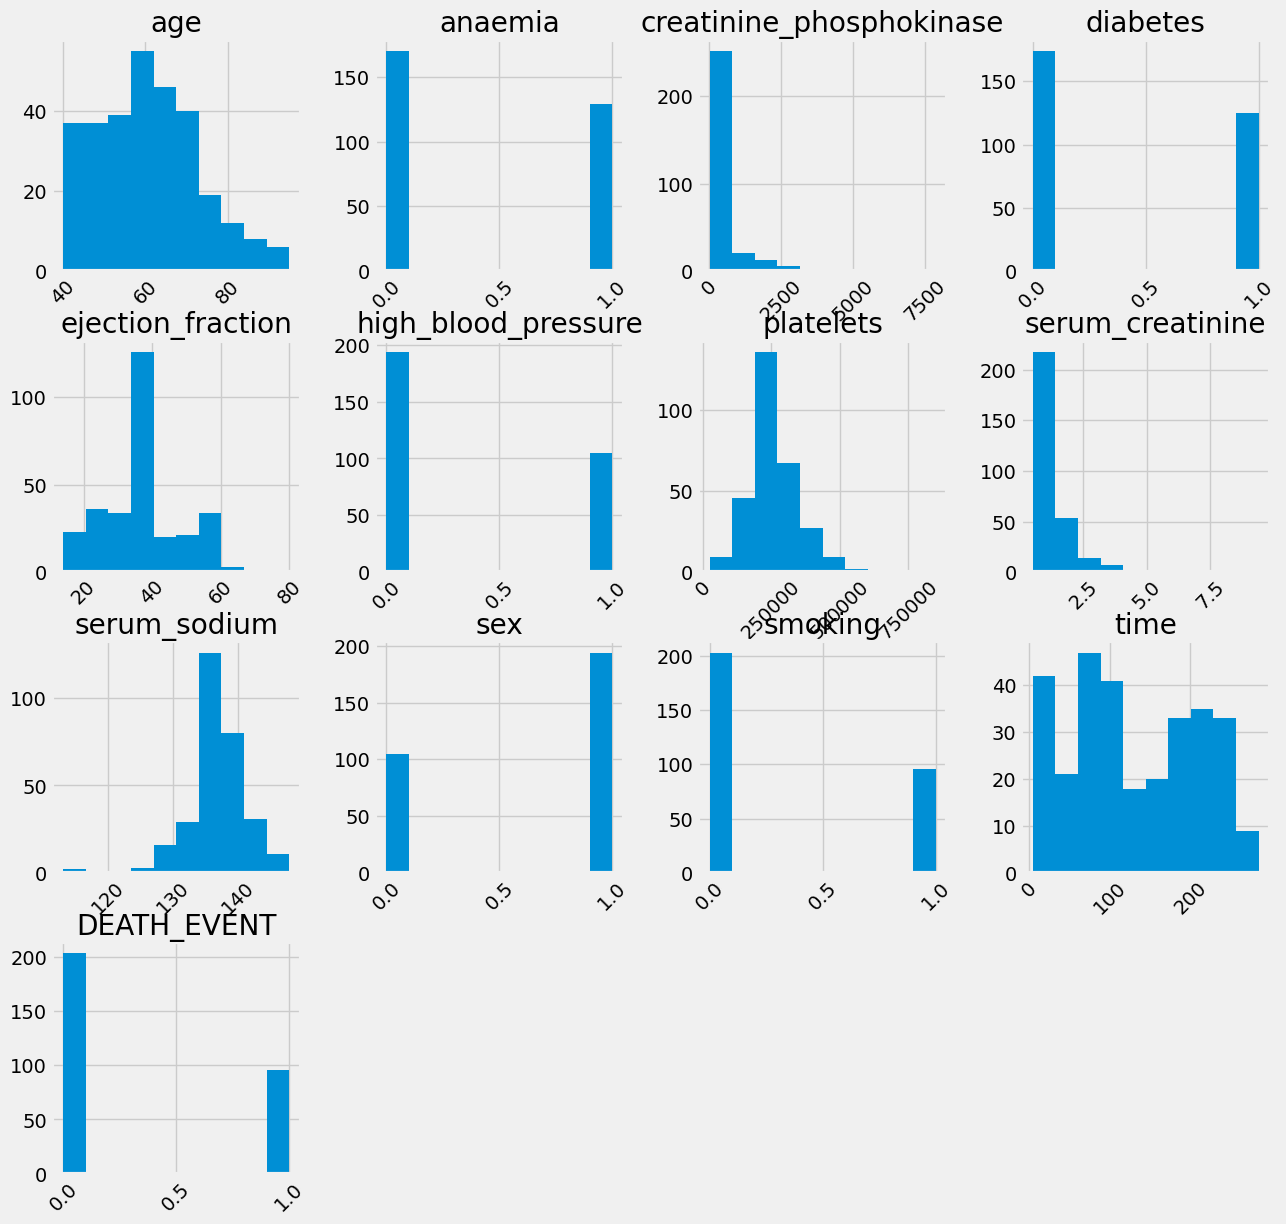

In [12]:
df.hist(figsize=(14,14), xrot=45)
plt.show()


In [13]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [14]:
numerical_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'] 

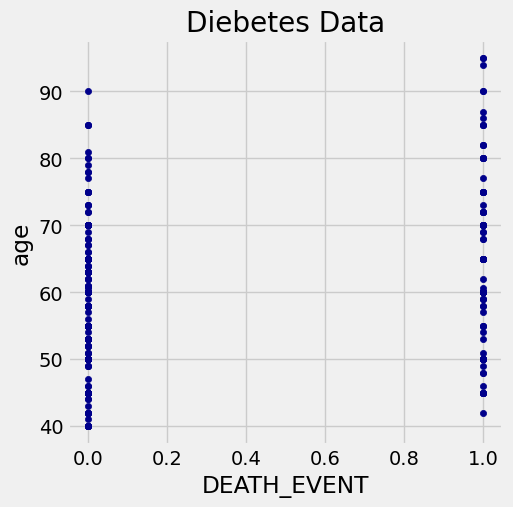

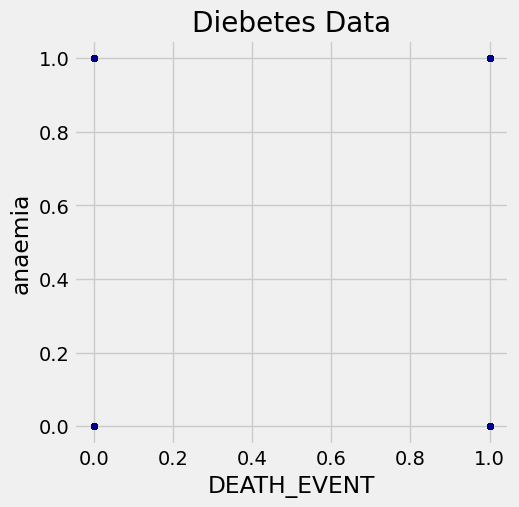

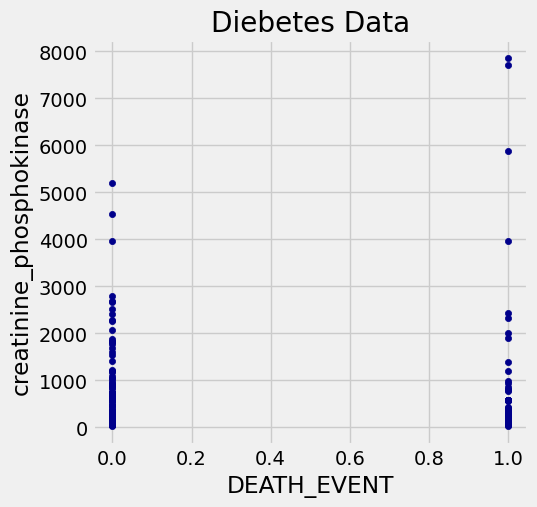

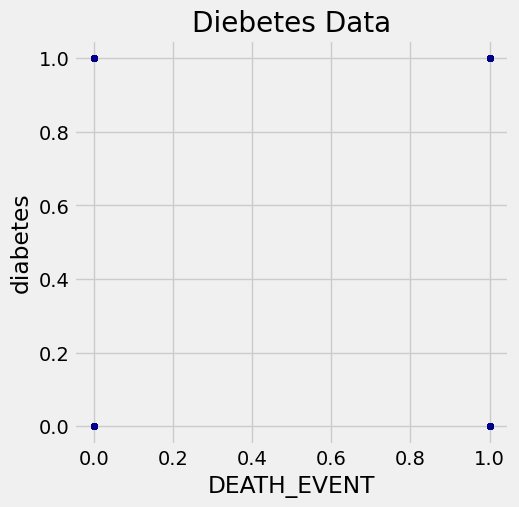

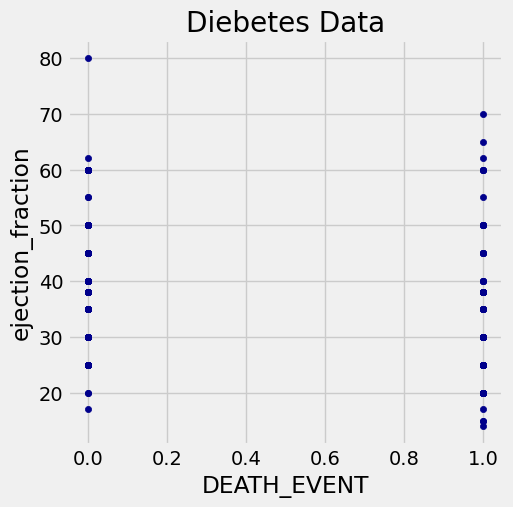

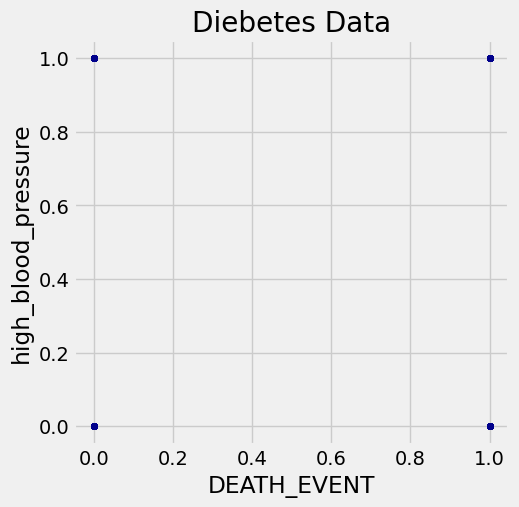

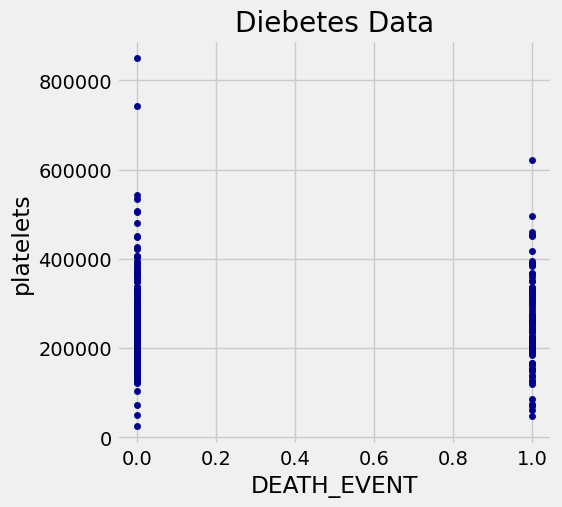

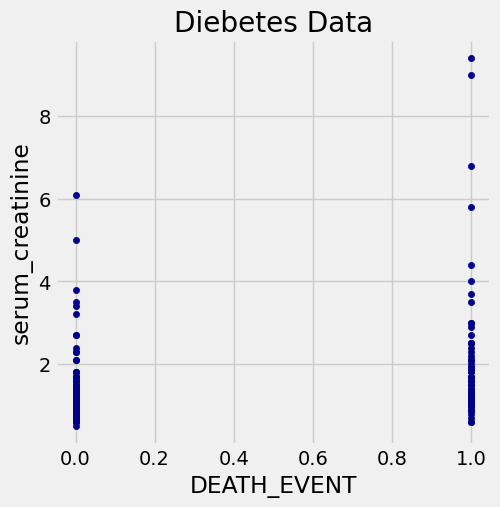

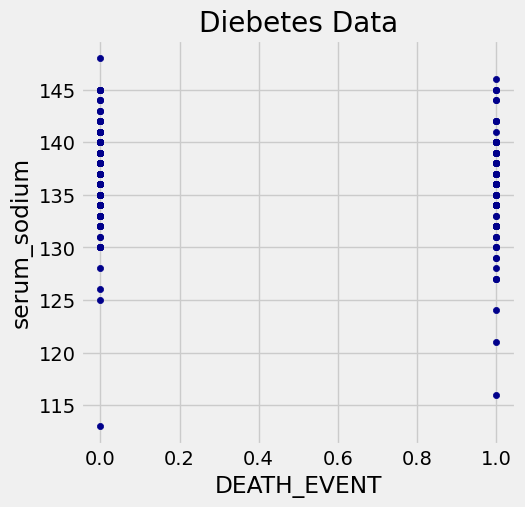

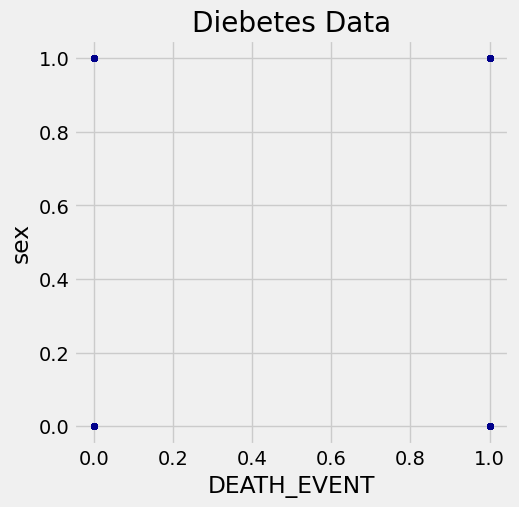

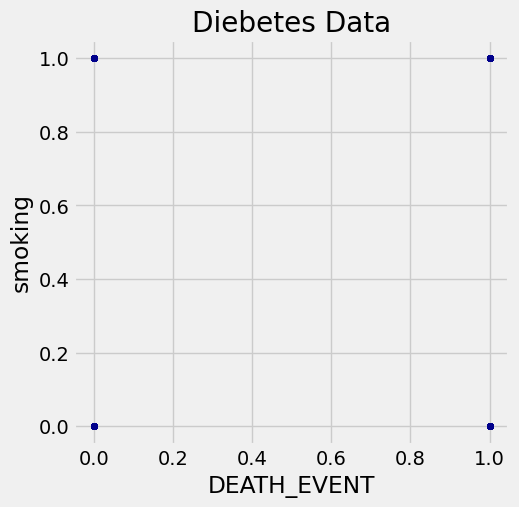

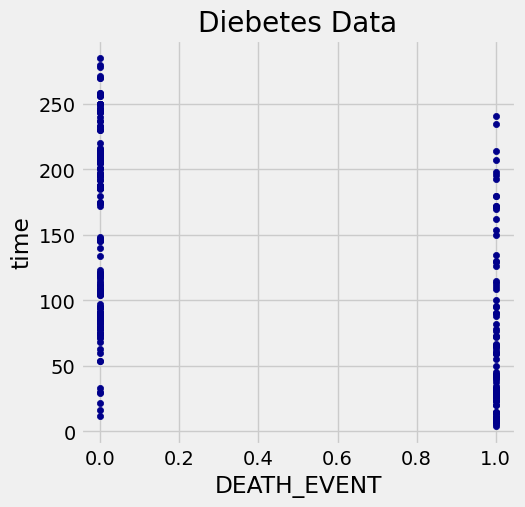

In [15]:
#displaying a scatterplot of all columns v/s price as the y axis. 
for ax in numerical_cols:
       g = df.plot.scatter(y=ax, x='DEATH_EVENT', c='Darkblue', figsize=(5, 5))
       plt.style.use('fivethirtyeight')
       g.set_title("Diebetes Data")
       
       

In [16]:
corr = df.corr()

<Axes: >

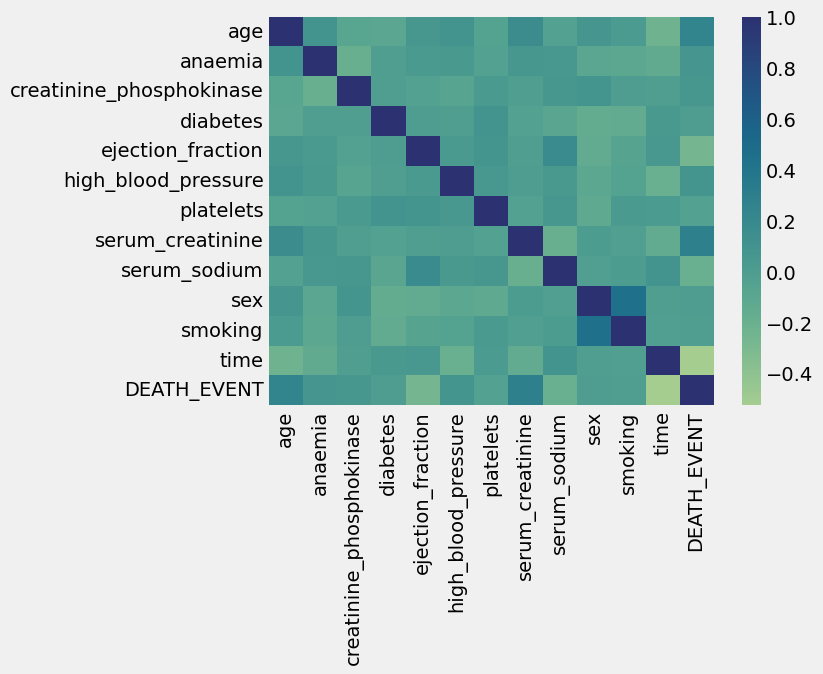

In [17]:
sns.heatmap(corr, cmap='crest')

# Baseline Models

In [18]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30)

### Logistic Regression 

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_y_pred = log_reg.predict(X_test)

log_recall      = recall_score(y_test, log_y_pred)
log_accuracy    = accuracy_score(y_test, log_y_pred)
log_roc_auc     = roc_auc_score(y_test, log_y_pred)
log_f1          = f1_score(y_test, log_y_pred) 
log_precision   = precision_score(y_test, log_y_pred, average='macro')

print ("Recall score    ", log_recall)
print ("Accuracy score  ", log_accuracy)
print ("F1 Score        ", log_f1)
print ("Precision Score ", log_precision)
print ("Roc Auc Score   ", log_roc_auc) 


Recall score     0.696969696969697
Accuracy score   0.8333333333333334
F1 Score         0.7540983606557378
Precision Score  0.8300691244239631
Roc Auc Score    0.8046251993620415


### Decision Tree

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

decision_recall      = recall_score(y_test, decision_y_pred)
decision_accuracy    = accuracy_score(y_test, decision_y_pred)
decision_roc_auc     = roc_auc_score(y_test, decision_y_pred)
decision_f1          = f1_score(y_test, decision_y_pred) 
decision_precision   = precision_score(y_test, decision_y_pred, average='macro')

print ("Recall score    ", decision_recall)
print ("Accuracy score  ", decision_accuracy)
print ("F1 Score        ", decision_f1)
print ("Precision Score ", decision_precision)
print ("Roc Auc Score   ", decision_roc_auc) 

Recall score     0.5454545454545454
Accuracy score   0.7777777777777778
F1 Score         0.6428571428571429
Precision Score  0.7793640493186242
Roc Auc Score    0.7288676236044657


### Random Forest

In [22]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
random_forest_y_pred = random_forest_clf.predict(X_test)

random_forest_recall      = recall_score(y_test, random_forest_y_pred)
random_forest_accuracy    = accuracy_score(y_test, random_forest_y_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_y_pred)
random_forest_f1          = f1_score(y_test, random_forest_y_pred)
random_forest_precision   = precision_score(y_test, random_forest_y_pred)   

print ("Recall score    ", random_forest_recall)
print ("Accuracy score  ", random_forest_accuracy)
print ("F1 Score        ", random_forest_f1)
print ("Precision Score ", random_forest_precision)
print ("Roc Auc Score   ", random_forest_roc_auc)

Recall score     0.8484848484848485
Accuracy score   0.9111111111111111
F1 Score         0.875
Precision Score  0.9032258064516129
Roc Auc Score    0.8979266347687401


### XGBoost 

In [23]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

xgb_recall      = recall_score(y_test, xgb_y_pred)
xgb_accuracy    = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred)
xgb_f1          = f1_score(y_test, xgb_y_pred)
xgb_precision   = precision_score(y_test, xgb_y_pred)

print ("Recall score    ", xgb_recall)
print ("Accuracy score  ", xgb_accuracy)
print ("F1 Score        ", xgb_f1)
print ("Precision Score ", xgb_precision)
print ("Roc Auc Score   ", xgb_roc_auc)

Recall score     0.7272727272727273
Accuracy score   0.8666666666666667
F1 Score         0.7999999999999999
Precision Score  0.8888888888888888
Roc Auc Score    0.8373205741626795


In [24]:
models = pd.DataFrame({
    'Model':['Logistic', 'Decision Tree', 'Random Forest','XGBoost'],
    'Accuracy Score' :[log_accuracy, decision_accuracy, random_forest_accuracy, xgb_accuracy],
    'Roc Auc Score' : [log_roc_auc, decision_roc_auc, random_forest_roc_auc, xgb_roc_auc]
})

#sns.barplot(x='', data=models) 
#plt.bar(x=models['Recall_SMOTE'])


models.sort_values(by='Accuracy Score', ascending=False)

Model  Accuracy Score  Roc Auc Score
2  Random Forest        0.911111       0.897927
3        XGBoost        0.866667       0.837321
0       Logistic        0.833333       0.804625
1  Decision Tree        0.777778       0.728868

# Pipelines for GridSearchCV

In [25]:
pipe_lr = Pipeline([
                  ('LR', LogisticRegression(random_state=42))
])

pipe_dt = Pipeline([ 
                  ('DT', DecisionTreeClassifier(random_state=42))

])

pipe_rf = Pipeline([ 
                  ('RF', RandomForestClassifier(random_state=42))

])

pipe_xgb = Pipeline([
                    ('XGB', XGBClassifier(random_state=42))
])

In [26]:
lr_param_grid = [{
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'LR__penalty': ['l1', 'l2'],
    'LR__max_iter': list(range(100,800,100)),
    'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}]

dt_param_grid = [{
            'DT__max_depth' : range(1,10),
            'DT__max_leaf_nodes': list(range(2, 100)),
            'DT__min_samples_split': range(1,5),
            'DT__criterion': ['gini','entropy'],
            'DT__min_samples_leaf': range(1,5)
}]

rf_param_grid = [{ 
    'RF__n_estimators': [200, 500],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
    'RF__max_depth' : [4,5,6,7,8],
    'RF__criterion' :['gini', 'entropy']
}]

xgb_param_grid = [{
        'XGB__n_estimators' : [50,100,150],
        'XGB__gamma': [0.5, 1, 1.5, 2, 5],
        'XGB__subsample': [0.6, 0.8, 1.0],
        'XGB__colsample_bytree': [0.6, 0.8, 1.0],
        'XGB__max_depth': [3, 4, 5]
        }]


In [27]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
                              param_grid=lr_param_grid, 
                              scoring ='roc_auc',
                              cv=3) 

dt_grid_search = GridSearchCV(estimator = pipe_dt,
                              param_grid = dt_param_grid,
                              scoring = 'roc_auc',
                              cv=3)

rf_grid_search = GridSearchCV(estimator = pipe_rf,
                              param_grid = rf_param_grid,
                              scoring = 'roc_auc',
                              cv=3)

xgb_grid_search = GridSearchCV(estimator = pipe_xgb,
                              param_grid = xgb_param_grid,
                              scoring = 'roc_auc',
                              cv=3)


In [28]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, xgb_grid_search]

In [29]:
for pipe in grids:
  pipe.fit(X, y)

In [30]:
pd.DataFrame(lr_grid_search.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_LR__C  \
67       0.002407      0.000054         0.002152        0.000073       0.001   
57       0.005099      0.002188         0.003201        0.000136       0.001   
47       0.004659      0.001075         0.011355        0.006123       0.001   
27       0.003391      0.000140         0.002655        0.000050       0.001   
17       0.003580      0.000088         0.002886        0.000013       0.001   

   param_LR__max_iter param_LR__penalty param_LR__solver  \
67                700                l2        liblinear   
57                600                l2        liblinear   
47                500                l2        liblinear   
27                300                l2        liblinear   
17                200                l2        liblinear   

                                               params  split0_test_score  \
67  {'LR__C': 0.001, 'LR__max_iter': 700, 'LR__pen...           0.975643   
57  {'LR__C': 0.001, 'LR__max_iter': 600, 'LR__pen...           0.975643   
47  {'LR__C': 0.001, 'LR__max_iter': 500, 'LR__pen...           0.975643   
27  {'LR__C': 0.001, 'LR__max_iter': 300, 'LR__pen...           0.975643   
17  {'LR__C': 0.001, 'LR__max_iter': 200, 'LR__pen...           0.975643   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
67           0.991728           0.962687         0.976686        0.011879   
57           0.991728           0.962687         0.976686        0.011879   
47           0.991728           0.962687         0.976686        0.011879   
27           0.991728           0.962687         0.976686        0.011879   
17           0.991728           0.962687         0.976686        0.011879   

    rank_test_score  
67                1  
57                1  
47                1  
27                1  
17                1

In [31]:
pd.DataFrame(dt_grid_search.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18911       0.002788      0.000584         0.002376        0.000075   
18910       0.002273      0.000097         0.002126        0.000023   
18906       0.002203      0.000047         0.002161        0.000025   
18905       0.002196      0.000064         0.002162        0.000062   
18917       0.002285      0.000056         0.002203        0.000087   

      param_DT__criterion param_DT__max_depth param_DT__max_leaf_nodes  \
18911             entropy                   4                        7   
18910             entropy                   4                        7   
18906             entropy                   4                        7   
18905             entropy                   4                        7   
18917             entropy                   4                        8   

      param_DT__min_samples_leaf param_DT__min_samples_split  \
18911                          4                           4   
18910                          4                           3   
18906                          3                           3   
18905                          3                           2   
18917                          2                           2   

                                                  params  split0_test_score  \
18911  {'DT__criterion': 'entropy', 'DT__max_depth': ...           0.580882   
18910  {'DT__criterion': 'entropy', 'DT__max_depth': ...           0.580882   
18906  {'DT__criterion': 'entropy', 'DT__max_depth': ...           0.580882   
18905  {'DT__criterion': 'entropy', 'DT__max_depth': ...           0.580882   
18917  {'DT__criterion': 'entropy', 'DT__max_depth': ...           0.580882   

       split1_test_score  split2_test_score  mean_test_score  std_test_score  \
18911           0.775965           0.548274         0.635041        0.100534   
18910           0.775965           0.548274         0.635041        0.100534   
18906           0.775965           0.548274         0.635041        0.100534   
18905           0.775965           0.548274         0.635041        0.100534   
18917           0.775965           0.548274         0.635041        0.100534   

       rank_test_score  
18911                1  
18910                1  
18906                1  
18905                1  
18917                1

In [32]:
pd.DataFrame(rf_grid_search.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1        0.572554      0.019763         0.041901        0.001944   
3        0.693259      0.097453         0.050414        0.006054   
5        0.561337      0.005615         0.042617        0.000351   
11       0.556837      0.005347         0.050200        0.006357   
9        0.556721      0.014725         0.043713        0.003323   

   param_RF__criterion param_RF__max_depth param_RF__max_features  \
1                 gini                   4                   auto   
3                 gini                   4                   sqrt   
5                 gini                   4                   log2   
11                gini                   5                   log2   
9                 gini                   5                   sqrt   

   param_RF__n_estimators                                             params  \
1                     500  {'RF__criterion': 'gini', 'RF__max_depth': 4, ...   
3                     500  {'RF__criterion': 'gini', 'RF__max_depth': 4, ...   
5                     500  {'RF__criterion': 'gini', 'RF__max_depth': 4, ...   
11                    500  {'RF__criterion': 'gini', 'RF__max_depth': 5, ...   
9                     500  {'RF__criterion': 'gini', 'RF__max_depth': 5, ...   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
1            0.843290           0.813419           0.823228         0.826646   
3            0.843290           0.813419           0.823228         0.826646   
5            0.843290           0.813419           0.823228         0.826646   
11           0.831801           0.816176           0.825560         0.824513   
9            0.831801           0.816176           0.825560         0.824513   

    std_test_score  rank_test_score  
1         0.012432                1  
3         0.012432                1  
5         0.012432                1  
11        0.006422                4  
9         0.006422                4

In [33]:
pd.DataFrame(xgb_grid_search.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
55        0.014754      0.000781         0.004072        0.000037   
54        0.013976      0.000157         0.003977        0.000118   
228       0.027624      0.002207         0.003718        0.000173   
213       0.036609      0.001671         0.004111        0.000147   
231       0.036352      0.001125         0.003913        0.000077   

    param_XGB__colsample_bytree param_XGB__gamma param_XGB__max_depth  \
55                          0.6              1.5                    3   
54                          0.6              1.5                    3   
228                         0.8                2                    4   
213                         0.8              1.5                    5   
231                         0.8                2                    4   

    param_XGB__n_estimators param_XGB__subsample  \
55                       50                  0.8   
54                       50                  0.6   
228                     100                  0.6   
213                     150                  0.6   
231                     150                  0.6   

                                                params  split0_test_score  \
55   {'XGB__colsample_bytree': 0.6, 'XGB__gamma': 1...           0.780331   
54   {'XGB__colsample_bytree': 0.6, 'XGB__gamma': 1...           0.779412   
228  {'XGB__colsample_bytree': 0.8, 'XGB__gamma': 2...           0.759881   
213  {'XGB__colsample_bytree': 0.8, 'XGB__gamma': 1...           0.770221   
231  {'XGB__colsample_bytree': 0.8, 'XGB__gamma': 2...           0.751608   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
55            0.356158           0.827892         0.654794        0.212058   
54            0.350184           0.813899         0.647832        0.210939   
228           0.335018           0.846315         0.647071        0.223459   
213           0.369026           0.788013         0.642420        0.193455   
231           0.369945           0.805271         0.642275        0.193808   

     rank_test_score  
55                 1  
54                 2  
228                3  
213                4  
231                5

In [34]:
#for model in grids:
 # best = model.best_estimator_
  #print (best)


In [35]:
grid_dict = {
    0:'Logistic Regression',
    1:'Decision Tree      ',
    2:'Random Forest      ',
    3:'XGBoost            '
}

for i, model in enumerate(grids):
    print('{}  Accuracy: {}'.format(grid_dict[i],
      model.score(X,y)))
    print('{}  Best Params: {}'.format(grid_dict[i],model.best_params_),'\n')
  

Logistic Regression  Accuracy: 0.8463669950738916
Logistic Regression  Best Params: {'LR__C': 0.001, 'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'} 

Decision Tree        Accuracy: 0.9210026683087028
Decision Tree        Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 4, 'DT__max_leaf_nodes': 7, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 2} 

Random Forest        Accuracy: 0.9770628078817734
Random Forest        Best Params: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'auto', 'RF__n_estimators': 500} 

XGBoost              Accuracy: 0.9944581280788177
XGBoost              Best Params: {'XGB__colsample_bytree': 0.6, 'XGB__gamma': 1.5, 'XGB__max_depth': 3, 'XGB__n_estimators': 50, 'XGB__subsample': 0.8} 



# Using white-box packages

In [36]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=401b06d5299bea91d13079146cec2c17570cb8a17307c3227070625113bfb8bb
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [37]:
import eli5

In [38]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [39]:
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100,C=0.01)
log_reg.fit(X_train,y_train)
log_y_pred = log_reg.predict(X_test)

log_accuracy    = accuracy_score(y_test, log_y_pred)
log_roc_auc     = roc_auc_score(y_test, log_y_pred)

print ("Accuracy score  ", log_accuracy)
print ("Roc Auc Score   ", log_roc_auc) 

Accuracy score   0.8222222222222222
Roc Auc Score    0.7894736842105261


In [40]:
show_weights(log_reg, show_feature_values=True)

In [41]:
eli5.show_prediction(log_reg, X.iloc[1], show_feature_values=True)

### Appling ELI5 to Decision Tree

In [42]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=2, max_leaf_nodes= 3, min_samples_leaf= 1, min_samples_split= 2)
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

decision_recall      = recall_score(y_test, decision_y_pred)
decision_accuracy    = accuracy_score(y_test, decision_y_pred)
decision_roc_auc     = roc_auc_score(y_test, decision_y_pred)
decision_f1          = f1_score(y_test, decision_y_pred) 
decision_precision   = precision_score(y_test, decision_y_pred, average='macro')

print ("Accuracy score  ", decision_accuracy)
print ("Roc Auc Score   ", decision_roc_auc) 

Accuracy score   0.8777777777777778
Roc Auc Score    0.8460925039872409


In [43]:
show_weights(decision_tree, show_feature_values=True)

It sucks cause it is decision tree that is causing this. random forest is much better in this regard 

In [44]:
eli5.show_prediction(decision_tree, X.iloc[1], show_feature_values=True)

why is this so bad i dont understand 

the grid search is not good, try changing it to roc auc score

#what to do next in this case 

In [45]:
random_forest_clf = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'auto', n_estimators = 200)
random_forest_clf.fit(X_train, y_train)
random_forest_y_pred = random_forest_clf.predict(X_test)

random_forest_recall      = recall_score(y_test, random_forest_y_pred)
random_forest_accuracy    = accuracy_score(y_test, random_forest_y_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_y_pred)
random_forest_f1          = f1_score(y_test, random_forest_y_pred)
random_forest_precision   = precision_score(y_test, random_forest_y_pred)   

print ("Accuracy score  ", random_forest_accuracy)
print ("Roc Auc Score   ", random_forest_roc_auc)

Accuracy score   0.9
Roc Auc Score    0.8700159489633174


In [46]:
show_weights(random_forest_clf, show_feature_values=True)

In [47]:
eli5.show_prediction(random_forest_clf, X.iloc[1], show_feature_values=True)

In [48]:
pip install lime 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=e15fdd0dc42838ec0dd0a78b22970eb22a57c0be6e98f1a939416063e446b2f7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [49]:
import lime
import lime.lime_tabular

In [50]:
X_train_lime = X_train.to_numpy()

In [51]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_lime, mode='classification', feature_names=X.columns)

In [54]:
#is he telling us to make a linear model with lime and check its r^2?? 

In [52]:
predict_fn_rf = lambda x: random_forest_clf.predict_proba(x).astype(float)


In [53]:
exp = explainer.explain_instance(X_test.iloc[20], predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)


In [55]:
predict_xgb = lambda x: xgb_clf.predict_proba(x).astype(float)


In [57]:
exp = explainer.explain_instance(X_test.iloc[20], predict_xgb,num_features=10)
exp.show_in_notebook(show_all=False)

In [62]:
print ("This is it, amazing stuff!!!!")

This is it, amazing stuff!!!!
